# Цель проекта

## Целью проекта является проведение разведочного анализа данных:

### 1. Проведение первичного осмотра данных: нахождение пропусков и аномалий;
### 2. Устранение ошибок в признаках: выбросов, неучтенных условием значений. Графический анализ распределения параметров;
### 3. Выявление наиболее важных признаков, влияющих на целевую переменную с помощью корреляционного анализа, анализа номинативных переменных. Отсеивание остальных признаков;
### 4. Формулировка выводов по оставшимся признакам и их влиянию на целевую переменную.
---

### Суть проекта - отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в зоне риска.

### Данные представляют собой датасет, содержащий следующие переменные:

##### school — аббревиатура школы, в которой учится ученик
##### sex — пол ученика ('F' - женский, 'M' - мужской)
##### age — возраст ученика (от 15 до 22)
##### address — тип адреса ученика ('U' - городской, 'R' - за городом)
##### famsize — размер семьи('LE3' <= 3, 'GT3' >3)
##### Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
##### Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
##### Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
##### Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
##### Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
##### reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
##### guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
##### traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
##### studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
##### failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
##### schoolsup — дополнительная образовательная поддержка (yes или no)
##### famsup — семейная образовательная поддержка (yes или no)
##### paid — дополнительные платные занятия по математике (yes или no)
##### activities — дополнительные внеучебные занятия (yes или no)
##### nursery — посещал детский сад (yes или no)
##### higher — хочет получить высшее образование (yes или no)
##### internet — наличие интернета дома (yes или no)
##### romantic — в романтических отношениях (yes или no)
##### famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
##### freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
##### goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
##### health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
##### absences — количество пропущенных занятий
##### score — баллы по госэкзамену по математике

### Переменные можно поделить на следующие типы:

##### score - целевой параметр, представляющий собой числовой признак;

##### Числовые признаки - age, absences и score;

##### Категориальные признаки - school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nurcery, higher, internet, romantic;

##### Порядковые или ординальные признаки - Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, health.

In [1]:
# Подключение библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import scipy.stats as ss
from sklearn import preprocessing
# Увеличение кол-ва столбцов при отображении
pd.set_option('display.max_columns', 50)
# Считывание .csv файла
stud_math = pd.read_csv(
    '/home/stormrider/Desktop/Python/Stud_math/stud_math.csv')

In [2]:
def null_count(column):
    """Вывод информации о количестве пропущенных значений"""

    print(' Кол-во наблюдений:', column.isnull().count(), '\n',
          'Кол-во пропущенных значений:', column.isnull().sum(), '\n',
          'Процент пропущенных значений:',
          int(round(column.isnull().sum()/column.isnull().count()*100, 0)), '%')


def get_hist(column):
    """Построение гистограммы"""

    fig, ax = plt.subplots(figsize=(14, 4))
    if column not in ['age', 'absences', 'score']:
        sns.countplot(stud_math.loc[:, column], palette='Dark2', ax=ax)
    else:
        sns.distplot(stud_math[column].dropna(), kde=False, bins=50)

        IQR = stud_math[column].quantile(0.75)-stud_math[column].quantile(0.25)
        perc25 = stud_math[column].quantile(0.25)
        perc75 = stud_math[column].quantile(0.75)
        print(' 25-й перцентиль:{},'.format(perc25),
              '75-й перцентиль:{},'.format(perc75),
              'IQR:{},'.format(IQR),
              'Границы выбросов:[{f},{i}].'.format(f=perc25-1.5*IQR,
                                                   i=perc75+1.5*IQR))

        sns.distplot(stud_math[column].loc[stud_math[column]
                                           .between(perc25-1.5*IQR,
                                                    perc75+1.5*IQR)].dropna(),
                     kde=False, bins=50)
    ax.set(ylabel='number of observations')
    plt.show()


# Не используется
def get_outlier(column, first, last):
    """Нахождение значений, отличающихся от условия"""

    column_list = []
    for feature in range(first, last+1):
        column_list.append(age)
    print(column.loc[column.isin(column_list) == False].unique())


# Не используется
def get_boxplot(column):
    """Построение boxplot"""

    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math,
                ax=ax)
    ax.set_title('Boxplot for '+column)
    plt.show()

# 1. Первичный осмотр данных.

In [3]:
stud_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


## 1.1 Проверим наличие пропусков в наборе данных.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

None

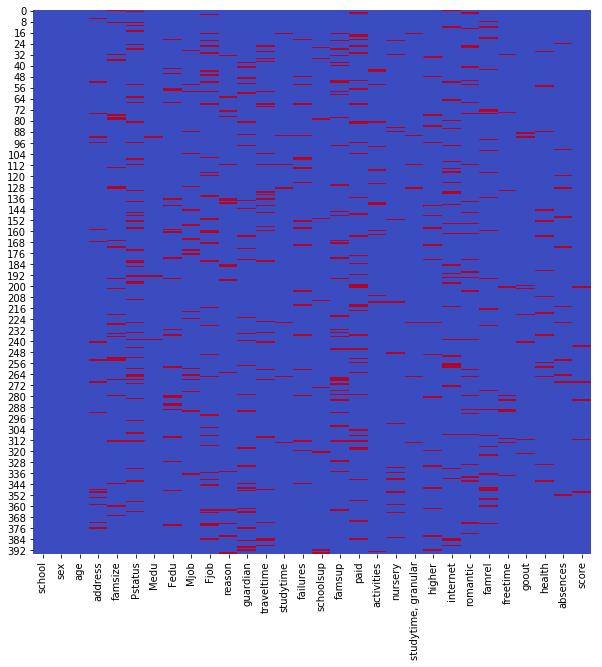

In [4]:
display(stud_math.info())
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=stud_math.isnull(), cmap='coolwarm', cbar=False)

### Как видно из тепловой карты - каждый признак в отдельности имеет небольшое количество пропущенных значений. Но в совокупности, количество неполных наблюдений из выборки достаточно существенное.
### Удаление таких наблюдений приведет к значительному сокращению выборки.
## 1.2 Списки уникальных значений по каждому параметру.

In [5]:
for column in stud_math.columns:
    print(column, stud_math.loc[:, column].unique())

school ['GP' 'MS']
sex ['F' 'M']
age [18 17 15 16 19 22 20 21]
address ['U' nan 'R']
famsize [nan 'GT3' 'LE3']
Pstatus ['A' nan 'T']
Medu [ 4.  1.  3.  2. nan  0.]
Fedu [ 4.  1.  2.  3. 40. nan  0.]
Mjob ['at_home' 'health' 'other' 'services' 'teacher' nan]
Fjob ['teacher' 'other' nan 'health' 'services' 'at_home']
reason ['course' 'other' 'home' 'reputation' nan]
guardian ['mother' 'father' 'other' nan]
traveltime [ 2.  1.  3. nan  4.]
studytime [ 2.  3.  1. nan  4.]
failures [ 0.  3. nan  2.  1.]
schoolsup ['yes' 'no' nan]
famsup ['no' 'yes' nan]
paid ['no' nan 'yes']
activities ['no' 'yes' nan]
nursery ['yes' 'no' nan]
studytime, granular [ -6.  -9.  -3.  nan -12.]
higher ['yes' nan 'no']
internet [nan 'yes' 'no']
romantic ['no' nan 'yes']
famrel [ 4.  5.  3. nan -1.  2.  1.]
freetime [ 3.  2.  4.  1.  5. nan]
goout [ 4.  3.  2.  1.  5. nan]
health [ 3.  5.  1.  2.  4. nan]
absences [  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.

### Можно сделать следующие выводы:
### - параметр absences имеет значения 385 и 212. Данные значения сильно выделяются на фоне остальной выборки и скорее всего являются ошибками;
### - параметр score имеет значение 0. Можно предположить, что нулевое количество баллов означает неявку или удаление с экзамена.
### - Параметр Fedu имеет значение 40.0. По условию параметр является категориальным и принимает значения из списка [0,1,2,3,4];
### - параметр famrel имеет значение -1. По условию параметр является порядковым и принимает значения из списка [1,2,3,4,5];
### - в наборе данных содежится параметр studytime, granular, неучтенный в условии.

# 2 Анализ распределения параметров.

## 2.1 Количество пропущенных значений. Распределение значений признаков.

 Распределение признака school

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 0 
 Процент пропущенных значений: 0 %


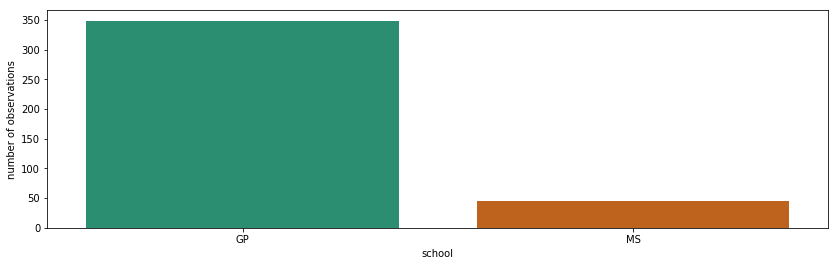

 Распределение признака sex

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 0 
 Процент пропущенных значений: 0 %


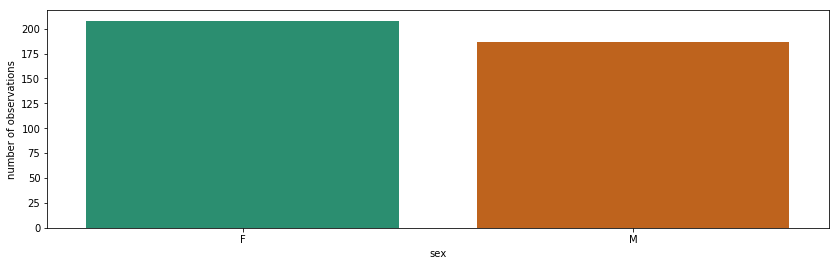

 Распределение признака age

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 0 
 Процент пропущенных значений: 0 %
 25-й перцентиль:16.0, 75-й перцентиль:18.0, IQR:2.0, Границы выбросов:[13.0,21.0].


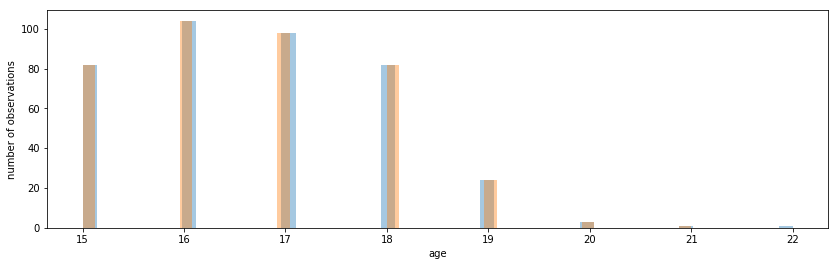

 Распределение признака address

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 17 
 Процент пропущенных значений: 4 %


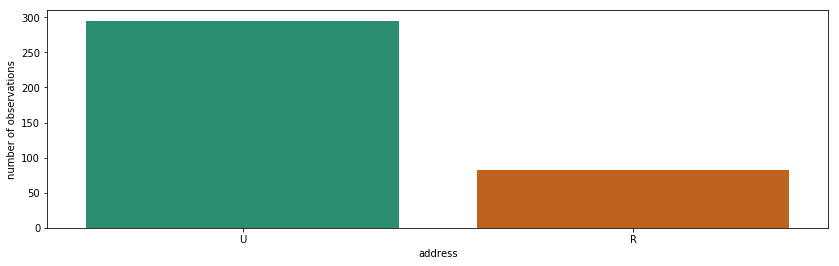

 Распределение признака famsize

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 27 
 Процент пропущенных значений: 7 %


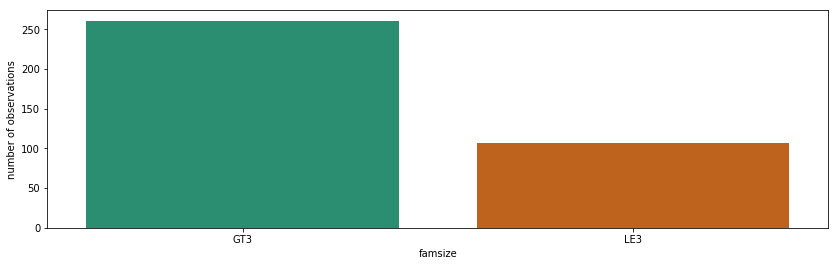

 Распределение признака Pstatus

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 45 
 Процент пропущенных значений: 11 %


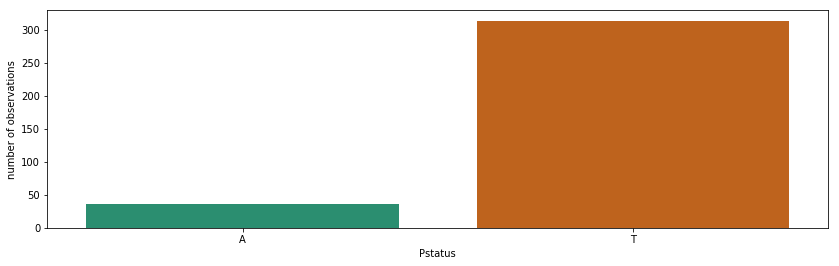

 Распределение признака Medu

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 3 
 Процент пропущенных значений: 1 %


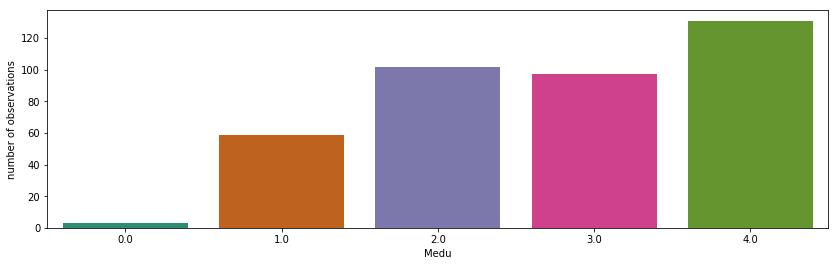

 Распределение признака Fedu

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 24 
 Процент пропущенных значений: 6 %


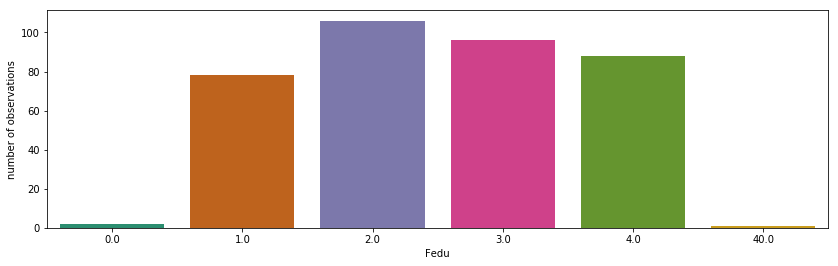

 Распределение признака Mjob

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 19 
 Процент пропущенных значений: 5 %


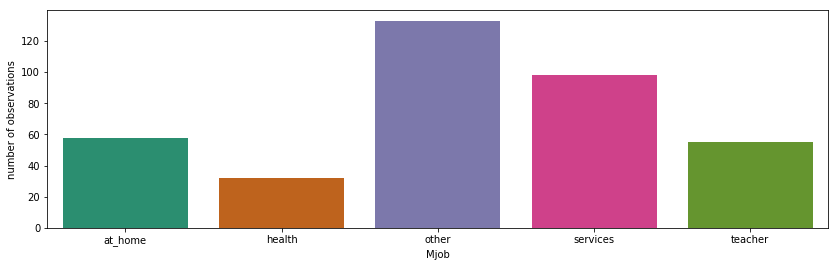

 Распределение признака Fjob

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 36 
 Процент пропущенных значений: 9 %


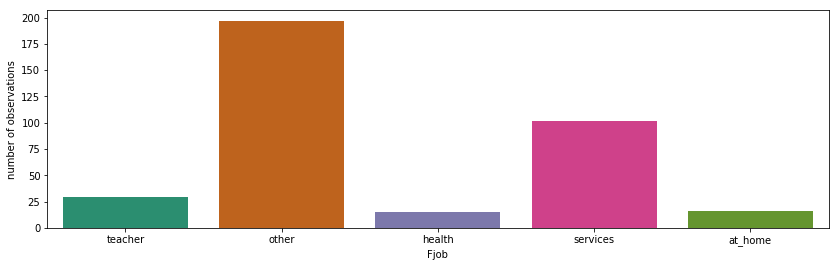

 Распределение признака reason

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 17 
 Процент пропущенных значений: 4 %


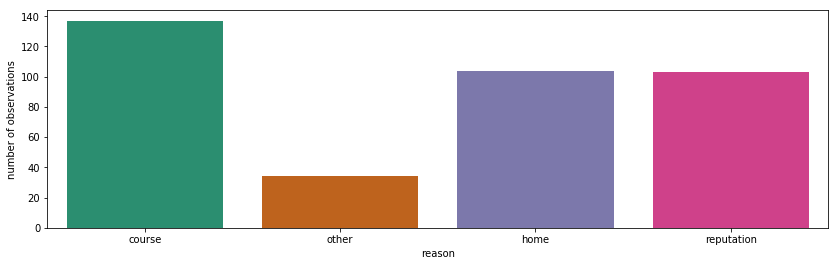

 Распределение признака guardian

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 31 
 Процент пропущенных значений: 8 %


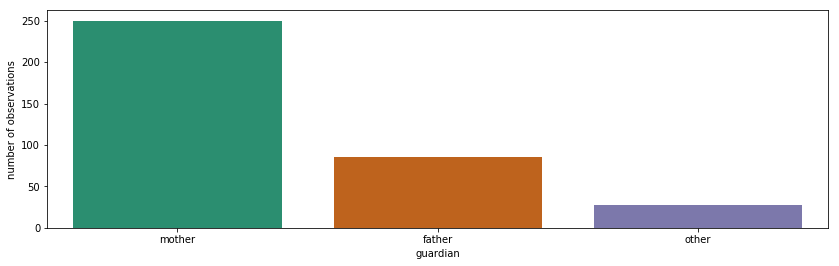

 Распределение признака traveltime

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 28 
 Процент пропущенных значений: 7 %


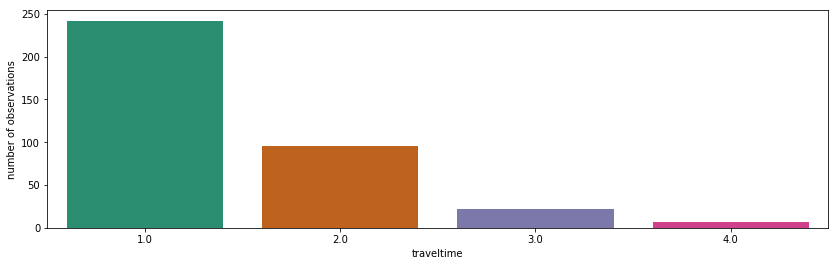

 Распределение признака studytime

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 7 
 Процент пропущенных значений: 2 %


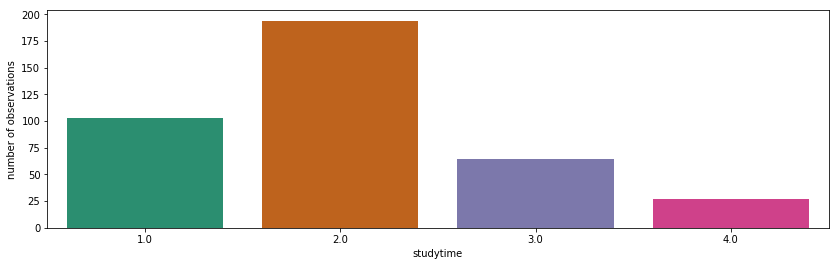

 Распределение признака failures

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 22 
 Процент пропущенных значений: 6 %


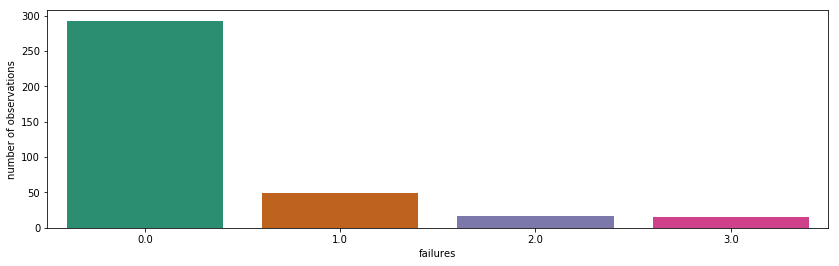

 Распределение признака schoolsup

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 9 
 Процент пропущенных значений: 2 %


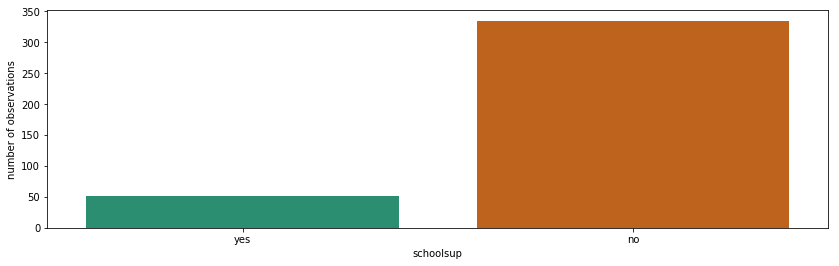

 Распределение признака famsup

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 39 
 Процент пропущенных значений: 10 %


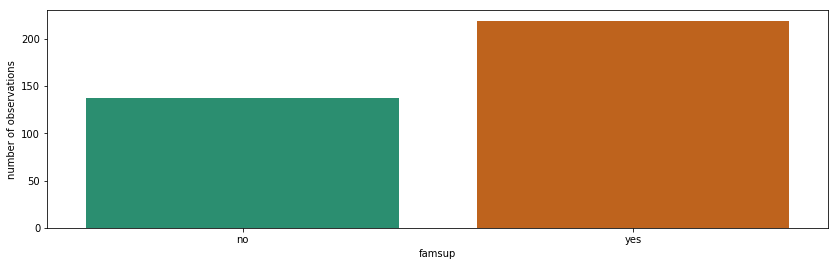

 Распределение признака paid

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 40 
 Процент пропущенных значений: 10 %


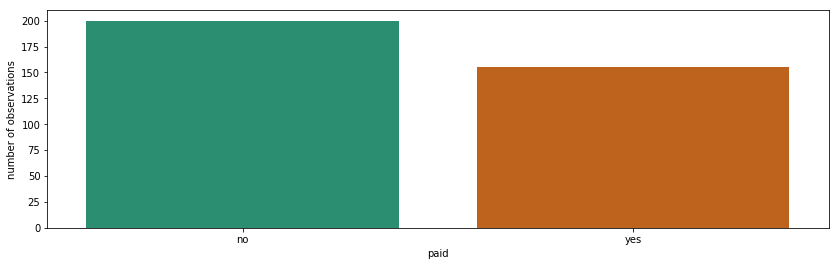

 Распределение признака activities

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 14 
 Процент пропущенных значений: 4 %


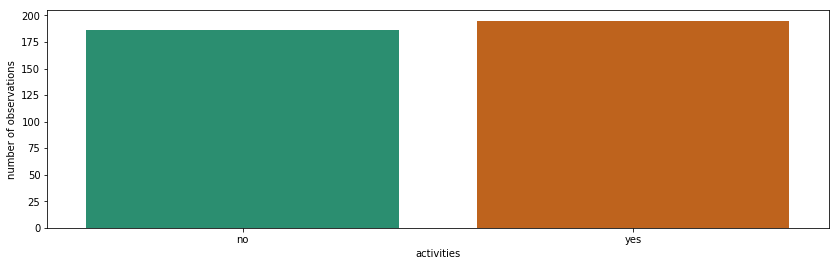

 Распределение признака nursery

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 16 
 Процент пропущенных значений: 4 %


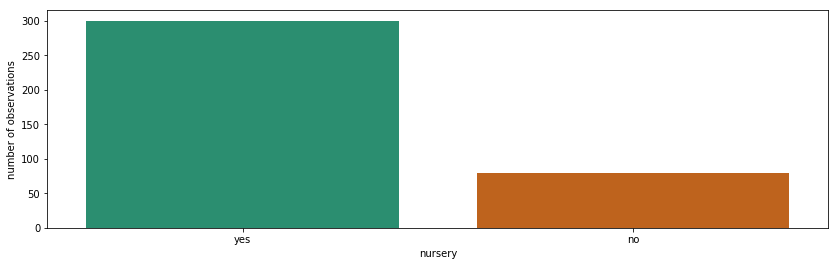

 Распределение признака studytime, granular

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 7 
 Процент пропущенных значений: 2 %


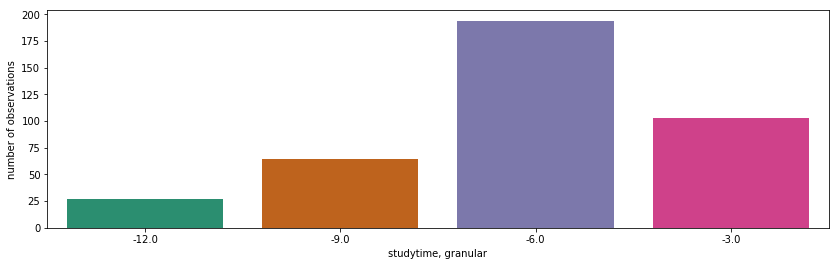

 Распределение признака higher

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 20 
 Процент пропущенных значений: 5 %


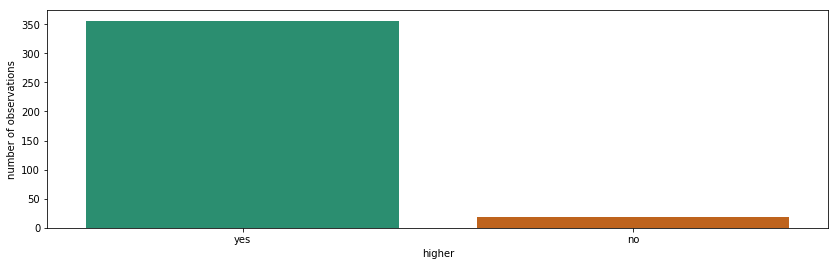

 Распределение признака internet

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 34 
 Процент пропущенных значений: 9 %


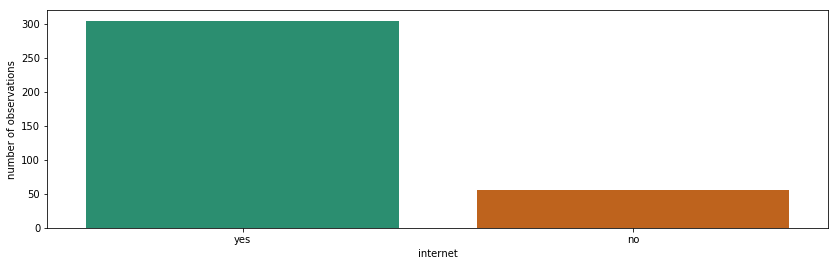

 Распределение признака romantic

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 31 
 Процент пропущенных значений: 8 %


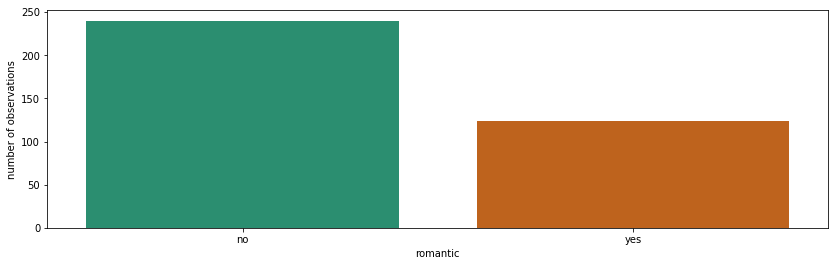

 Распределение признака famrel

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 27 
 Процент пропущенных значений: 7 %


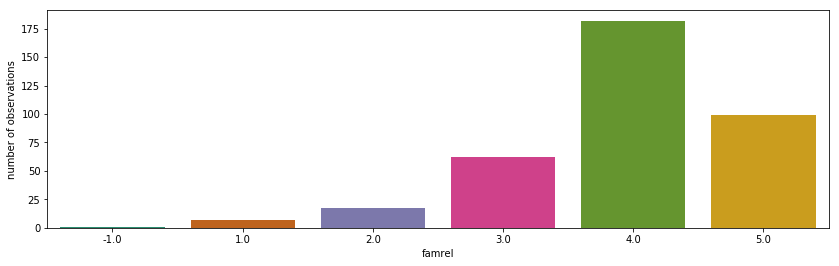

 Распределение признака freetime

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 11 
 Процент пропущенных значений: 3 %


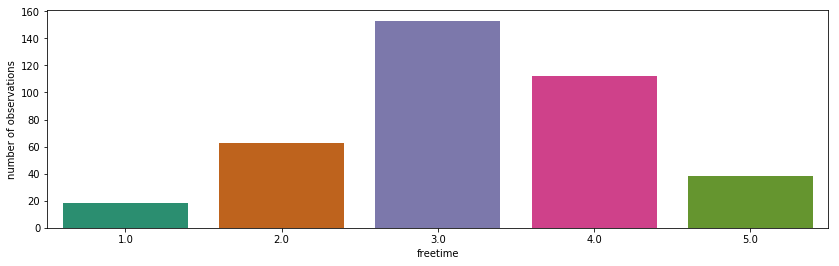

 Распределение признака goout

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 8 
 Процент пропущенных значений: 2 %


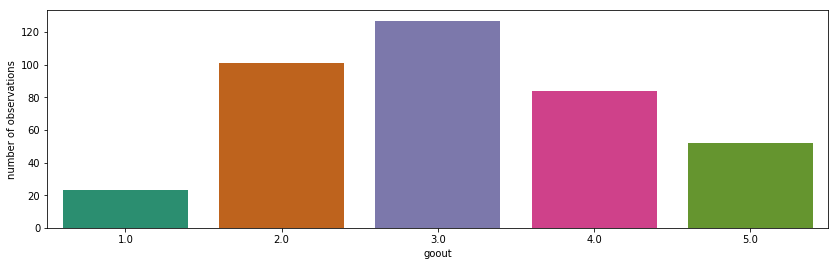

 Распределение признака health

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 15 
 Процент пропущенных значений: 4 %


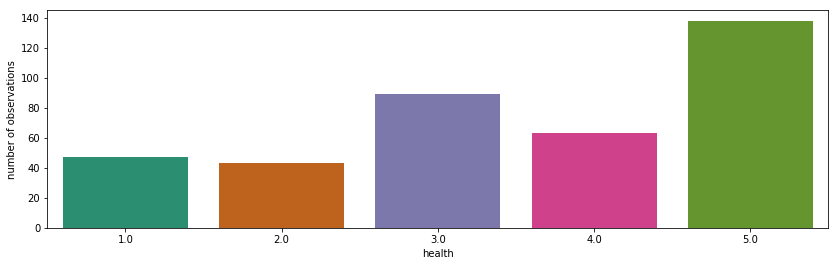

 Распределение признака absences

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 12 
 Процент пропущенных значений: 3 %
 25-й перцентиль:0.0, 75-й перцентиль:8.0, IQR:8.0, Границы выбросов:[-12.0,20.0].


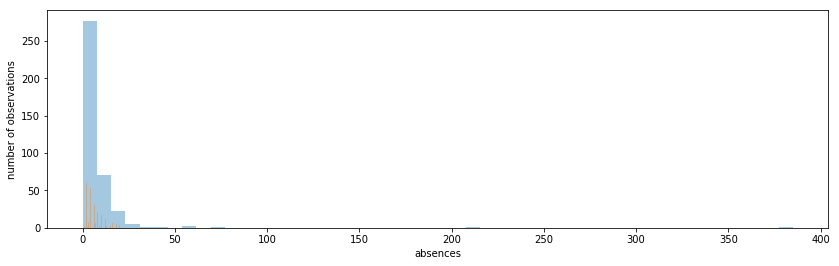

 Распределение признака score

 Кол-во наблюдений: 395 
 Кол-во пропущенных значений: 6 
 Процент пропущенных значений: 2 %
 25-й перцентиль:40.0, 75-й перцентиль:70.0, IQR:30.0, Границы выбросов:[-5.0,115.0].


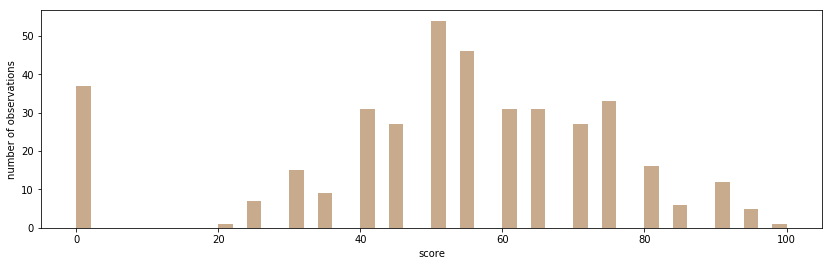

In [6]:
for column in stud_math.columns.tolist():
    print(' Распределение признака '+column+'\n')
    null_count(stud_math[column])
    get_hist(column)

### Максимальное количество пропущенных значений в признаках - 11 % от общего количества наблюдений. Т.к. процент количества пропусков небольшой, удалять параметры с пропущенными значениями не стоит.

### На графиках параметров Fedu, famrel, absences можно заметить аномальные значения, оговоренные в п.1.2.

In [7]:
display(stud_math[stud_math.absences.isin([212, 385])],
        stud_math[stud_math.Fedu == 40],
        stud_math[stud_math.famrel == -1])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


### В датасете присутствуют всего четыре значения, являющиеся аномалиями. Т.к. количество таких значений невилико, заменим их на самые популярные значения.

In [8]:
stud_math.absences=stud_math.absences.replace(212,stud_math.absences.value_counts().index[0])
stud_math.absences=stud_math.absences.replace(385,stud_math.absences.value_counts().index[0])
stud_math.Fedu=stud_math.Fedu.replace(40,stud_math.Fedu.value_counts().index[0])
stud_math.famrel=stud_math.famrel.replace(-1,stud_math.famrel.value_counts().index[0])

# 3. Корреляционный анализ, распределения целевого параметра по числовым переменным.

## 3.1 Корреляция числовых переменных. Распределение числовых переменных по целевому параметру.

### Среди числовых параметров можно выделить три: age, absences и score ( целевой параметр). Для оценки корреляции данных параметров воспользуемся коэффициентом Спирмена.

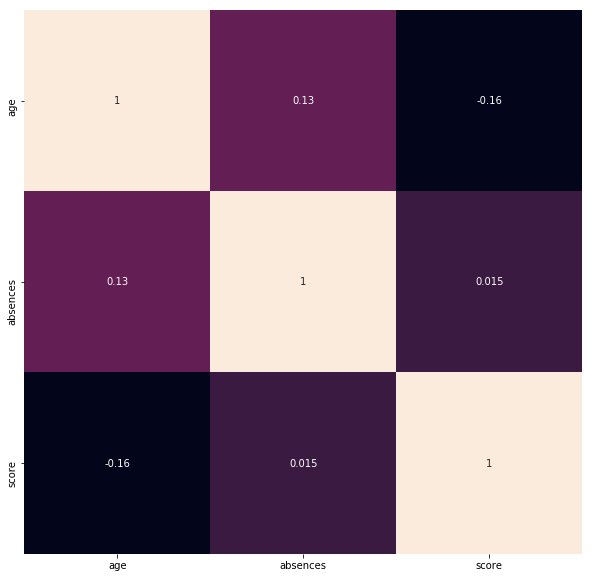

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=stud_math.loc[:, ['age', 'absences', 'score']].corr(method='spearman'), annot=True, cbar=False)

### Можно предположить, что переменная absences практически не влияет на целевой параметр score.
### Максимальную корреляцию можно наблюдать между переменными age и score, модуль значения коэффициента которой составляет 0,16.
### Переменная absences слабо коррелирует с целевым параметром score.
### Посмотрим, как числовые переменные распределены по целевому параметру.

## 3.1.1 Признак absences

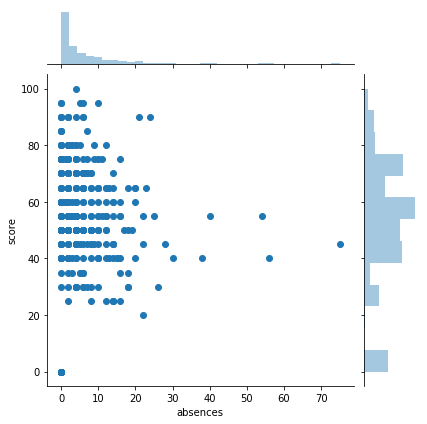

In [10]:
sns.jointplot(x="absences", y="score", data=stud_math)

### Из графика можно увидеть, что количество баллов уменьшается с ростом количества пропущенных занятий.

### При этом, нулевое количество баллов имеется только у наблюдений с нулевым количеством пропущенных занятий.

In [11]:
stud_math[stud_math.score==0].absences.dropna().unique()

array([0.])

### Можно предположить, что нулевое количество баллов охарактеризовано отсутствием пропущенных занятий.

In [21]:
stud_math[stud_math.absences!=0].loc[:, ['absences', 'score']].corr(method='spearman')

,absences,score
absences,1.000000,-0.190333
score,-0.190333,1.000000


### При отсеивании нулевых значений критерия absences, корреляция параметров absences и score возрастает.

## 3.1.2 Признак age

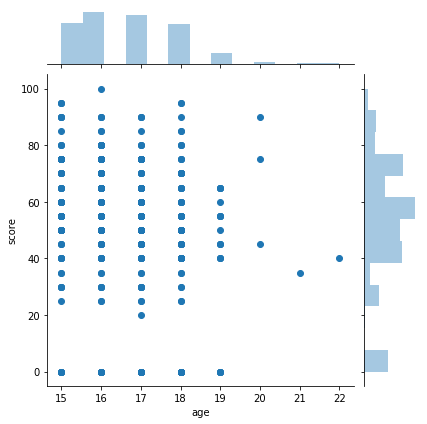

In [12]:
sns.jointplot(x="age", y="score", data=stud_math)

### Сложно сделать какие-нибудь выводы из графика: большинство наблюдений приходятся на возраст в диапазоне от 15 до 18 лет. В данном диапазоне распределение баллов приблизительно одинаковое.

## 3.2 Распределение целевого параметра по категориальным/порядковым переменным.

### Посмотрим, как категориальные параметры коррелируют друг с другом. Для этого воспользуемся методом Cramer's V, основанном на статистическом критерии Пирсона Хи-квадрат:

In [13]:
np.seterr(divide='ignore', invalid='ignore')


def cramers_V(var1, var2):
    """Метод крамера"""

    # Построение таблицы сопряженности для двух параметров
    confusion_matrix = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
    # Получение расчитанной статистики. Нам нужен только первый возвращаемый аргумент
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
    # Количество наблюдений ( непустых значений)
    #obs = np.sum(cross_tab)
    # Минимальное расстояние между строками или столбцами таблицы сопряженности
    #mini = min(cross_tab.shape)-1
    # Вывод мер корреляции
    #return (stat/(obs*mini))


# Получаем датафрейм без числовых параметров
stud_math_cat = stud_math.drop(['age', 'score', 'absences'],
                               axis='columns', inplace=False)

# Создание матрциы корреляций
rows = []

for var1 in stud_math_cat:
    # Создание списка-столбца для двумерной матрицы
    col = []
    for var2 in stud_math_cat:
        # Тест Cramer's V
        cramers = cramers_V(stud_math_cat[var1], stud_math_cat[var2])
        # Заполнение списка-столбца мерами корреляции с округлением
        # до 2 чисел после запятой
        col.append(round(cramers, 2))
    # Добавление списка-столбца в матрицу
    rows.append(col)

# Создание датафрейма из матрицы корреляций
cramers_results = np.array(rows)
cat_corr = pd.DataFrame(cramers_results, columns=stud_math_cat.columns,
                        index=stud_math_cat.columns)

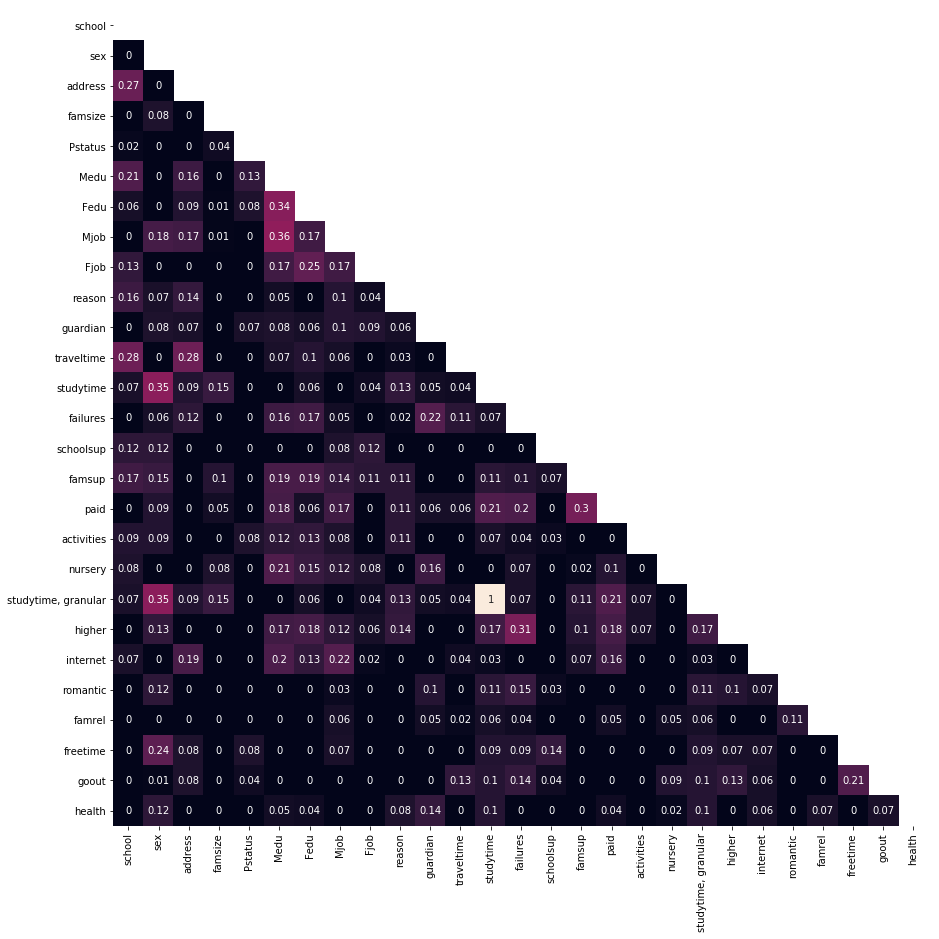

In [14]:
mask = np.zeros_like(cat_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 15))
with sns.axes_style("white"):
    ax = sns.heatmap(cat_corr, mask=mask,vmin=0., vmax=1, square=True, annot=True, cbar=False)

plt.show()

### Распределения параметров studytime и stadytime, granular полностью коррелируют между собой.
### Отоносительно высокие значения корреляции ( > 0,25 ) можно увидеть между параметрами:
### - school, address,traveltime;
### - sex, studytime;
### - Fedu, Medu;
### - Mjob, Medu;
### - Fedu, Fjob;
### - higher, failures;
### - paid, famsup;
### Т.к. параметр studytime, granular не имеет описания, исключим его из датафрейма.

In [15]:
stud_math.drop('studytime, granular', axis='columns', inplace=True)

### Рассмотрим распределение параметра score по нечисловым переменным.

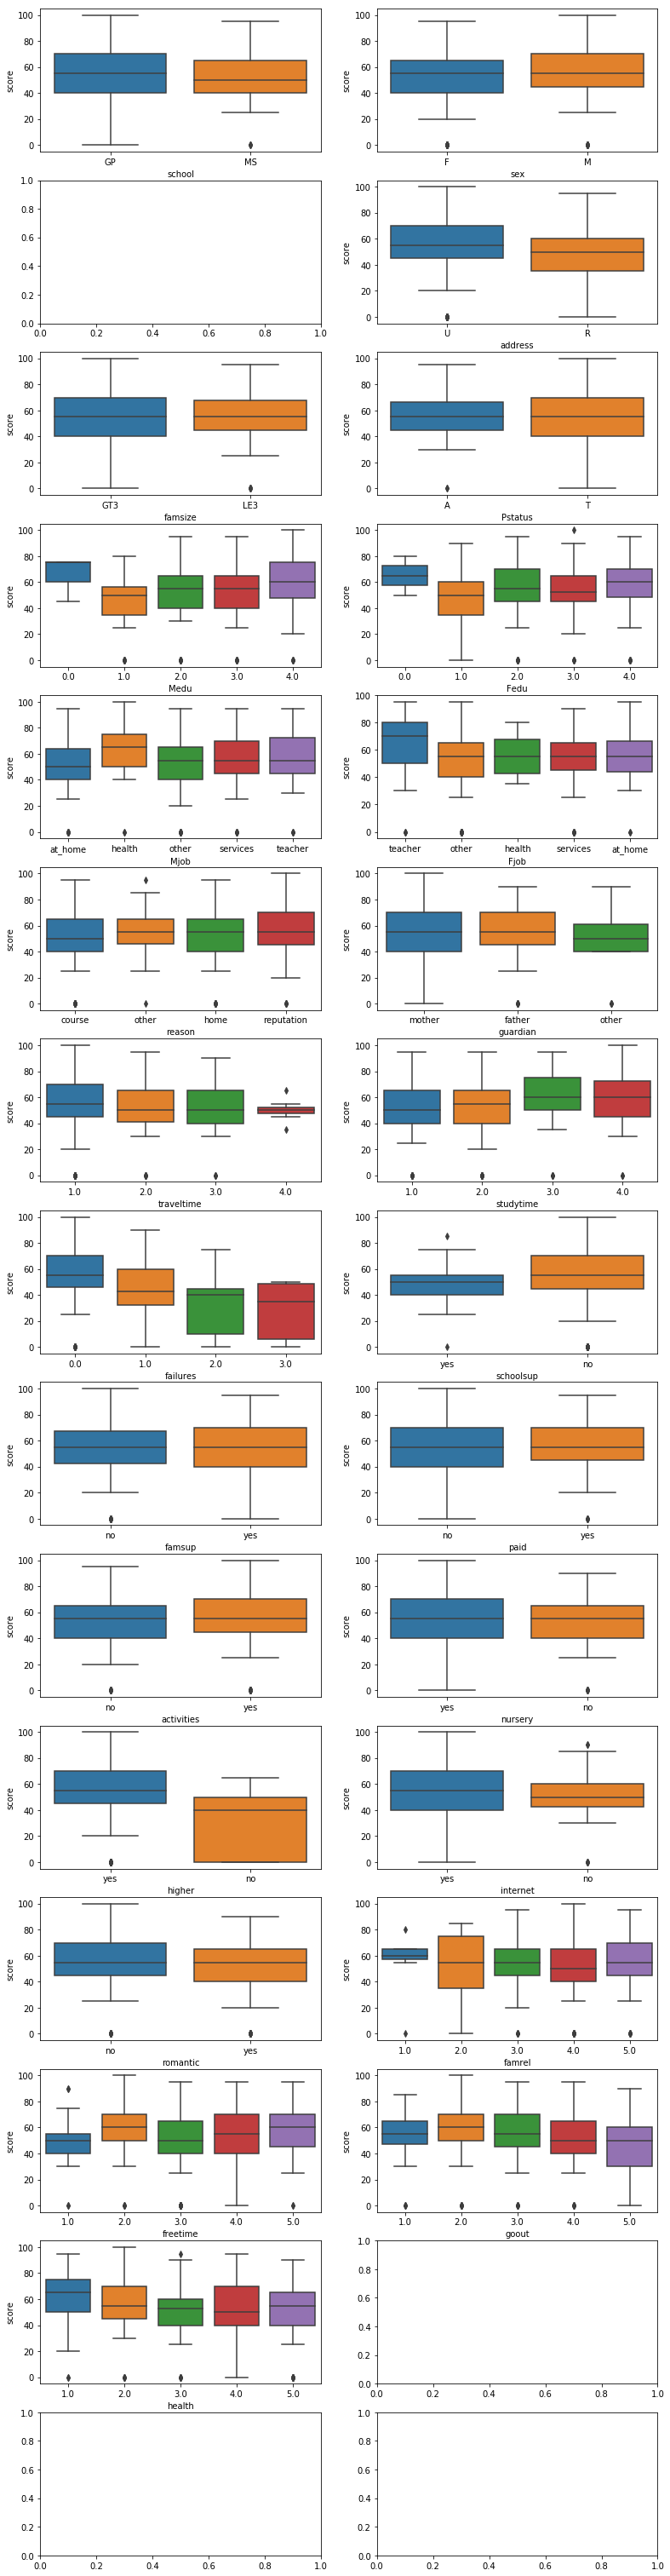

In [16]:
fig, ax = plt.subplots(15, 2, figsize=(13, 55))
for var, subplot in zip(stud_math.columns.tolist(), ax.flatten()):
    if var not in ['age','absences','score']:
        sns.boxplot(x=var, y='score', data=stud_math, ax=subplot)

### По графикам failures и higher можно предположить, что данные переменные оказывают значительное влияние на целевой параметр.

### Также в графиках  Medu, Fedu можно отметить, что у учеников, родители которых не имеют образования, балы в целом выше среднего. Попробуем выделить наличие образования в отдельные переменные для дальнейшей оценки их влияния на целевой параметр.

In [17]:
stud_math['M_has_edu']=stud_math.Medu.apply(lambda x: 'no' if x==0 else None if pd.isnull(x) else 'yes')
stud_math['F_has_edu']=stud_math.Fedu.apply(lambda x: 'no' if x==0 else None if pd.isnull(x) else 'yes')

### Проверим наличие статистической разницы в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения полученных баллов по различным критериям неразличимы.
### Согласно критерию Бонферрони, если хотя бы одна из множества гипотез не удовлетворяет условию pvalue<alpha/m, где m - количество гипотез, то нулевая гипотеза отвергается.

In [18]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'].dropna(),
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score'].dropna()).pvalue \
                <= 0.05/len(combinations_all):  # Поправка Бонферони
            print('Найдены статистические значимые различия для оценки', column)
            break


for col in stud_math_cat.drop('studytime, granular', axis='columns', inplace=False).columns.unique():
    get_stat_dif(col)

Найдены статистические значимые различия для оценки address
Найдены статистические значимые различия для оценки Medu
Найдены статистические значимые различия для оценки Mjob
Найдены статистические значимые различия для оценки failures
Найдены статистические значимые различия для оценки higher
Найдены статистические значимые различия для оценки romantic
Найдены статистические значимые различия для оценки goout


### Важные переменные, которые, возможно, оказывают влияние на оценку, это: age, absences, address, Medu, Mjob, failures, higher, romantic, goout. Созданим dataframe на основе старого с описанными выше параметрами:

In [25]:
stud_math_model = stud_math.loc[:, ['age', 'absences', 'address', 'Medu',
                                    'Mjob', 'failures', 'higher', 'romantic',
                                    'goout', 'score']]
stud_math_model.head()

,age,absences,address,Medu,Mjob,failures,higher,romantic,goout,score
0,18,6.0,U,4.0,at_home,0.0,yes,no,4.0,30.0
1,17,4.0,U,1.0,at_home,0.0,yes,no,3.0,30.0
2,15,10.0,U,1.0,at_home,3.0,yes,NaN,2.0,50.0
3,15,2.0,U,4.0,health,0.0,yes,yes,2.0,75.0
4,16,4.0,U,3.0,other,0.0,yes,no,2.0,50.0


# 4. Выводы
### - каждый из параметров содержит небольшое количество пропущенных значений ( от 0% у параметра age до 8% у параметра romantic). 
### - нулевые значения целевой переменной имеются только у наблюдений с нулевым значением absences. При этом величина корреляции между параметрами absences и score составляет - 0,19 при ненулевых значениях absences.
### - параметры Medu и Mjob хорошо коррелируют между собой с мерой корреляции 0,36. Этим можно воспользоваться при инпутации пропущенных значений в дальнейшем.
### - gпраметры higher и failures хорошо коррелируют между собой с мерой корреляции 0,31. Этим можно воспользоваться при инпутации пропущенных значений в дальнейшем.
### - на результаты экзамена влияют такие параметры, как возраст, количество пропусков, место жительства, образование и работа матери, количество неудач, желание получить высшее образование, наличие романтических отношений и количество времени, проводимого с друзьями.
